# Diwali Fashion Recommendation System

### Problem Statement:

During Diwali, e-commerce platforms like Myntra show personalized product recommendations like 
“People who bought Kurtas also bought Dupattas” or “Top festive combos for you.”

Your goal is to build a simple AI recommendation system that:
	•	Suggests similar products based on product categories, prices, and popularity.
	•	Helps understand how AI recommendation systems work behind the scenes.

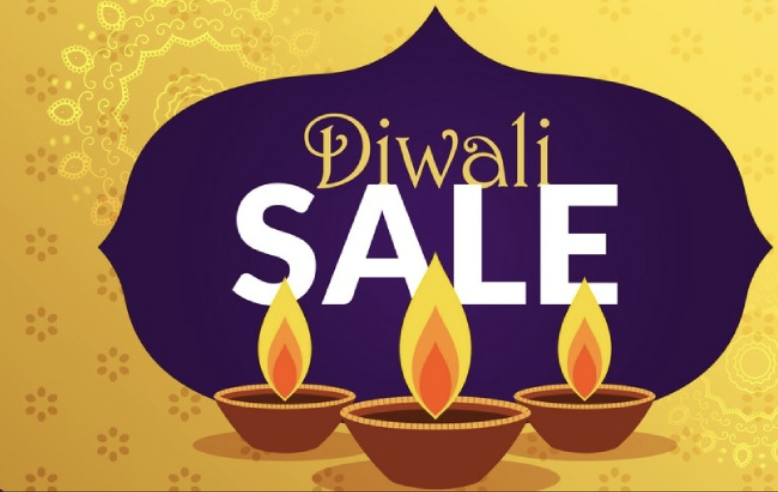

### 1. Let's install libraries first using pip install 

In [3]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


### 2. Let's import your data (.csv) to understand your data first

In [6]:
import pandas as pd

data = pd.read_csv(r"/Users/bhawanasaxena/Downloads/diwali_products.csv",encoding_errors='ignore')

print(data)
print("\nColumns:",data.columns)
print("\nSize:",data.shape)

   product_id          product_name      category  price  popularity  \
0           1     Festive Kurta Set   Ethnic Wear   1499          95   
1           2   Embroidered Dupatta   Ethnic Wear    899          85   
2           3  Gold Plated Earrings   Accessories    499          90   
3           4       Party Wear Gown  Western Wear   2299          80   
4           5                 Jutti      Footwear    999          75   
5           6            Silk Saree   Ethnic Wear   1999          88   
6           7  Handcrafted Bracelet   Accessories    599          82   
7           8          Casual Kurti   Ethnic Wear    899          70   
8           9                 Heels      Footwear   1299          78   
9          10       Diwali Gift Box         Gifts    699          92   

                                   description  
0   Traditional kurta for Diwali celebrations.  
1             Elegant dupatta with embroidery.  
2      Stylish earrings for festive occasions.  
3     Perfe

### 3. Now let's create AI recommendation system and Run the code

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
data = pd.read_csv(r"/Users/bhawanasaxena/Downloads/diwali_products.csv",encoding_errors='ignore')

# Combine text features for better similarity
data["combined_features"] = (
    data["category"] + " " +
    data["description"]
)

# Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
feature_vectors = vectorizer.fit_transform(data["combined_features"])

# Compute cosine similarity between products
similarity = cosine_similarity(feature_vectors)

# Recommendation function
def recommend(product_name):
    if product_name not in data['product_name'].values:
        return "Product not found. Try another name!"
    
    idx = data[data['product_name'] == product_name].index[0]
    scores = list(enumerate(similarity[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]  # top 5
    
    print("\n🪔 Diwali Sale is Live 🪔")
    print(f"\nSince you searched '{product_name}'🛍️, you may also like, \n")
    for i, score in sorted_scores:
        print(f"{data.iloc[i]['product_name']} ({data.iloc[i]['category']}) - ₹{data.iloc[i]['price']}")

# Example
recommend("Silk Saree") 

#Try with other examples
#recommend("Jutti")



🪔 Diwali Sale is Live 🪔

Since you searched 'Silk Saree'🛍️, you may also like, 

Casual Kurti (Ethnic Wear) - ₹899
Embroidered Dupatta (Ethnic Wear) - ₹899
Festive Kurta Set (Ethnic Wear) - ₹1499
Handcrafted Bracelet (Accessories) - ₹599
Gold Plated Earrings (Accessories) - ₹499


### 4. Let's understand the code ,how it works and what it does :

**1. imported libraries**

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

	•	pandas → helps to load and handle tabular data (like CSV files).
	•	TfidfVectorizer → converts text data into numerical form so the computer can understand it.
	•	cosine_similarity → calculates how similar two products are based on their text features.
    
 
====================================================================================================

**2. Loading the dataset**

data = pd.read_csv(r"/Users/bhawanasaxena/Downloads/diwali_products.csv", encoding_errors='ignore')

	•	Reads your CSV file (list of Diwali products) into a DataFrame named data.
	•	encoding_errors='ignore' helps skip unreadable characters.
    
    
====================================================================================================

**3. Combining text columns**

 data["combined_features"] = (
    data["category"] + " " +
    data["description"]
)

	•	Joins two text columns : category and description ,into one string.
	•	Example: "Kurta" + "Festive cotton kurta for Diwali" → "Kurta Festive cotton kurta for Diwali".
	•	This gives richer information about each product.
    
    
====================================================================================================

**4. Converting text to numbers (vectorization)**

vectorizer = TfidfVectorizer(stop_words='english')

feature_vectors = vectorizer.fit_transform(data["combined_features"])


	•	TfidfVectorizer transforms text into numeric vectors based on how important each word is.
	•	Words like “the”, “is”, “and” (stop words) are ignored.
	•	fit_transform() learns and applies this conversion to your product data.


====================================================================================================


**5. Calculating similarity between all products**

similarity = cosine_similarity(feature_vectors)

	•	Measures how similar two products are using their text vectors.
	•	Returns a matrix where each value shows similarity between two products (0 = not similar, 1 = very similar).


====================================================================================================

**6. Defining the recommendation function**

def recommend(product_name):

	•	A function to suggest similar products when a user enters one.
    
    
====================================================================================================

**7. Checking if product exists**

  if product_name not in data['product_name'].values:
    
      return "Product not found. Try another name!"
      
   
  	•	If the product isn’t in your dataset, shows a friendly message.


====================================================================================================

**8. Finding similarity scores**

  8.1. Getting the index of the searched product

  idx = data[data['product_name'] == product_name].index[0]
  
  	•	Finds the row number of the product the user searched for.
  
  
  8.2. Calculate imilarity scores
  scores = list(enumerate(similarity[idx]))
  
  	•	Gets a list of all products and how similar each one is to the selected product.
    
====================================================================================================

**9. Sorting top recommendations**

  sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]
  
  	•	Sorts all products by similarity score (highest first).
	
    •	[1:6] means top 5 products (excluding the same product).


====================================================================================================

**10. Displaying the recommendations**


   	•	Prints a pretty Diwali message. 
    
	•	Displays product name, category, and price for top 5 similar items.
    
    Code : 
    
    print("\n🪔 Diwali Sale 🪔")    
    print(f"\nYou searched '{product_name}'🛍️, you may also like, \n")    
    for i, score in sorted_scores:    
        print(f"{data.iloc[i]['product_name']} ({data.iloc[i]['category']}) - ₹{data.iloc[i]['price']}")

====================================================================================================

**11. Run Examples to check the recommendation system**

recommend("Party Wear Gown")

	•	Calls the function to find similar Diwali sale products for “Party Wear Gown”.